#  Descente de Gradient pour Fonctions Convexes

---

## 1️⃣ Introduction
**Objectif :** Illustrer la descente de gradient pour des fonctions convexes, à une et deux variables.  
**Méthode :** Descente de gradient avec **critère d’arrêt ** et suivi des positions successives.

> 💡 La convexité garantit que le minimum trouvé est global.

---

# Partie A : Fonction à une variable

## 2️⃣ Fonction et gradient
Fonction choisie :  


$f(x) = \ln(x^2 + 3)$


Dérivée :  


$f'(x) = \frac{2x}{x^2 + 3}$

Mise à jour selon la descente de gradient :  

$x_{n+1} = x_n - \alpha \, f'(x_n)$

- `alpha` : taux d’apprentissage  
- `epsilon` : critère de convergence  
- `max_iter` : nombre maximal d’itérations  

## 3️⃣ Descente de Gradient et Tracé
- La fonction `mise_a_jour(a_n, alpha)` :  
  - Calcule la trajectoire de la descente  
  - Arrête le calcul dès que $|x_{n+1} - x_n| < \epsilon$ 
  - Trace la fonction et les points de descente :  
    - **Vert** : point de départ  
    - **Rouge** : trajectoire  
    - **Bleu** : minimum approché  

- Exemple d’exécution :

($a_{n}=2.0, \alpha =0.1)$


In [167]:
import math
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

# Fonction f(x) = ln(x²+3)
def f(x):
    return math.log(x**2 + 3)

# Sa dérivée f'(x) = 2x / (x²+3)
def derive(x):
    return 2*x / (x**2 + 3)

# Mise à jour selon descente de gradient
def algo_descent(a_n, alpha):
    return a_n - alpha * derive(a_n)

# Descente de gradient avec critère d'arrêt
def mise_a_jour(a_n, alpha, epsilon=1e-9, max_iter=10000):
    
    i = 0
    if a_n< 0:
        a=-1*a_n
    else:
        a=a_n
    history = [a_n]  # on garde en mémoire les positions successives
    
    while True:
        i += 1
        a_new = algo_descent(a_n, alpha)  # mise à jour
        
        # critère d'arrêt
        if abs(a_new - a_n) < epsilon:
            print(f"Convergence atteinte à l'itération {i+1}") 
            break
        
        a_n = a_new
        history.append(a_n)
        
        if i >= max_iter:  # sécurité
            print(f"Arrêt : nombre max d'itérations atteint : {i}")
            break

    # --- Tracé de la courbe et des points de descente ---
    X = np.linspace(-a-1, a+1, 500)
    Y = [f(x) for x in X]
    plt.plot(X, Y, label="f(x) = ln(x²+3)")
    
    # points parcourus par la descente
    plt.scatter(history, [f(x) for x in history], color="red", s=10, label="Descente")
    plt.scatter(history[0], f(history[0]), color="green", s=20, label="Départ")  # départ
    plt.scatter(history[-1], f(history[-1]), color="blue", s=20, label="Minimum approché")  # arrivée
    
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.title("Descente de gradient sur f(x) = ln(x²+3)")
    plt.legend()
    plt.grid(True)
    plt.show()

    return a_n


Convergence atteinte à l'itération 284


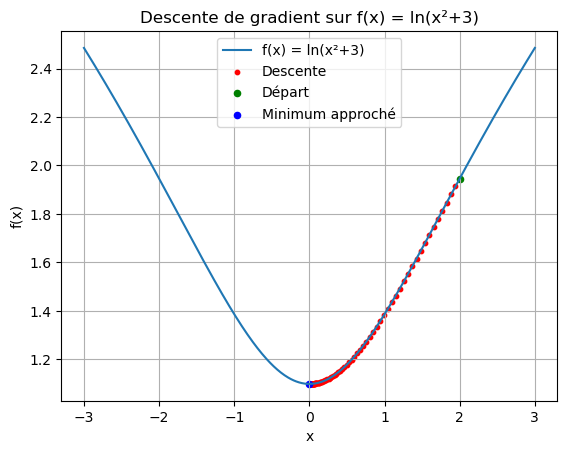

Valeur finale de X  :  0.0
La valeur de la fonction coût est : 1.09861


In [168]:
    a0 = 2
    alpha = 0.1
    resultat = mise_a_jour(a0, alpha)
    print("Valeur finale de X  : ", round(resultat,3))
    print(f"La valeur de la fonction coût est : {round(f(resultat),5)}")

# Partie B : Descente de Gradient pour une fonction à deux variables

---

## 1️⃣ Introduction
**Objectif :** Implémenter la descente de gradient pour une fonction **convexe à deux variables**.  
**Fonction choisie :**  

$
f(x,y) = \ln(e^x + e^y)
$

**Méthode :** Descente de gradient avec suivi et **critère d’arrêt **.  

> 💡 Astuce : La convexité garantit que le minimum trouvé est global.

---

## 2️⃣ Descente de Gradient avec Boucle `while`
**Description :**  
- Utilisation d’une boucle `while` jusqu’à convergence.  

**Critère d’arrêt  :**  


$\textbf{arrêt si } $
\begin{cases} 
\|x_{\text{new}} - x\| < \epsilon_x \\
|f(x_{\text{new}},y_{\text{new}}) - f(x,y)| < \epsilon_f \\
\|\nabla f(x_{\text{new}},y_{\text{new}})\| < \epsilon_{\text{grad}}
\end{cases}


**Avantage :**  
- S’arrête automatiquement dès que la convergence est atteinte, **sans fixer le nombre d’itérations**.

---

## 3️⃣ Résultats et Observations
- Affichage de l’évolution de la descente (valeurs tous les 1000 pas) 📊  
- Résultat final : Coordonnées $(x,y)$ et valeur de $f(x,y)$ ✅  
- Commentaires :  
  - Convergence rapide si `alpha` bien choisi  
  - Importance de `epsilon` pour un arrêt précis  
  - La descente suit bien la direction du gradient, illustrant la trajectoire vers le minimum

---

## 4️⃣ Conclusion
- ✅ Les critères d’arrêt intelligents améliorent la robustesse et évitent les boucles inutiles.  
- ✅ La convexité garantit que le minimum trouvé est **global**.  
- 💡 La boucle `while` est particulièrement adaptée pour les descentes adaptatives et interactives.


In [176]:
import numpy as np

# -----------------------------
# Fonction et gradient
# -----------------------------
def f(v):
    x, y = v
    return np.log(np.exp(x) + np.exp(y))

def grad(v):
    x, y = v
    e_x, e_y = np.exp(x), np.exp(y)
    denom = e_x + e_y
    return np.array([e_x / denom, e_y / denom])

# -----------------------------
# Descente de gradient 2D avec while et critère intelligent
# -----------------------------
def gradient_descent_nd(f, grad, x0, alpha=0.01, epsilon_x=1e-2, epsilon_f=1e-2, epsilon_grad=1e-2, max_iter=10000):
    x = np.array(x0, dtype=float)
    history = [x.copy()]
    print(f"Itération {0}: x = {x0[0]:.6f}, y = {x0[1]:.6f}, f(x,y) = {f(x0):.6f}")
    i = 0
    while i < max_iter:
        g = grad(x)
        x_new = x - alpha * g
        history.append(x_new.copy())
        i += 1
        
        # Affichage tous les 1000 pas
        
        if i % 1000 == 0:
            print(f"Itération {i}: x = {x_new[0]:.6f}, y = {x_new[1]:.6f}, f(x,y) = {f(x_new):.6f}")
        
        # Critère d'arrêt intelligent
        if np.linalg.norm(x_new - x) < epsilon_x and abs(f(x_new) - f(x)) < epsilon_f:
            print(f"Convergence atteinte (variation x et f) à l'itération {i}")
            break
        if np.linalg.norm(g) < epsilon_grad:
            print(f"Convergence atteinte (gradient proche de 0) à l'itération {i}")
            break
        
        x = x_new
    
    # Résultat final
    print(f"\n Arrêt: nombre maximal d'itération atteint")
    print(f"\tRésultat final après {len(history)-1} itérations :")
    
    print(f"\tx = {x[0]:.6f}, y = {x[1]:.6f}, f(x,y) = {f(x):.6f}")
    
    return x, np.array(history)

# -----------------------------
# Paramètres et exécution


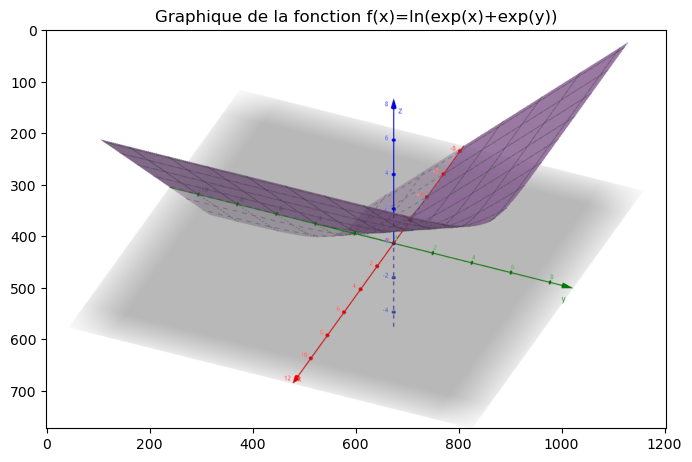

Itération 0: x = -50.000000, y = 50.000000, f(x,y) = 50.000000
Itération 1000: x = -55.002865, y = -54.997135, f(x,y) = -54.306849
Itération 2000: x = -110.000000, y = -110.000000, f(x,y) = -109.306853
Itération 3000: x = -165.000000, y = -165.000000, f(x,y) = -164.306853
Itération 4000: x = -220.000000, y = -220.000000, f(x,y) = -219.306853
Itération 5000: x = -275.000000, y = -275.000000, f(x,y) = -274.306853
Itération 6000: x = -330.000000, y = -330.000000, f(x,y) = -329.306853
Itération 7000: x = -385.000000, y = -385.000000, f(x,y) = -384.306853
Itération 8000: x = -440.000000, y = -440.000000, f(x,y) = -439.306853
Itération 9000: x = -495.000000, y = -495.000000, f(x,y) = -494.306853
Itération 10000: x = -550.000000, y = -550.000000, f(x,y) = -549.306853

 Arrêt: nombre maximal d'itération atteint
	Résultat final après 10000 itérations :
	x = -550.000000, y = -550.000000, f(x,y) = -549.306853


In [178]:

# Charger l'image exportée de GeoGebra
img = mpimg.imread("graph.png")

# Afficher
plt.figure(figsize=(8,6))
plt.imshow(img)
plt.axis('on')  # optionnel, enlève les axes
plt.title("Graphique de la fonction f(x)=ln(exp(x)+exp(y))")
plt.show()


x0 = [-50, 50]   # point de départ
alpha = 0.11
res, hist = gradient_descent_nd(f, grad, x0, alpha)
